In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/wine_cleared.csv')

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Вычислите наименьший балл за вино в датасете.

In [4]:
df['points'].min()

80


Вычислите наименьшую цену за бутылку в наборе данных.

In [5]:
df.price.min()

4.0

In [6]:
!pip install statistics

In [7]:
import statistics

СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ

Среднее арифметическое — сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (Series).

Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

In [8]:
statistics.mean(df['price'])

35.363389129985535

In [9]:
df['price'].mean()

35.36338912999136

Среднее арифметическое хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно плохо работает для признака с большим разбросом в значениях. 

Возьмём в пример рост человека. Если в выборке попадутся игроки баскетбольной команды или карлики, представление о среднем росте человека сильно исказится. Если таких значений в выборке будет мало, скорее всего, они будут обработаны на этапе очистки данных от выбросов. Если после очистки данных большой разброс останется, вы можете снова вернуться к этому этапу, так как цикл машинного обучения не линеен, или использовать другую описательную статистику для получения среднего значения.

МЕДИАНА

Медиана — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 

Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.

In [10]:
statistics.median(df['price'])

28.0

In [11]:
df['price'].median()

28.0

В отличие от среднего арифметического медиана хорошо справляется с разбросом в значениях, поэтому её чаще используют. Также медиана разбивает данные на две группы, состоящие из одинакового количества элементов.

Также в библиотеке statistics есть функции, связанные с медианой, — функция statistics.median_low() и функция statistics.median_high().

→ В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и median().

В случае, когда количество элементов чётное, у нас получается два средних значения:

median_low() возвращает меньшее из них;
median_high() возвращает большее из них.
Примечание. Если в вашем наборе данных есть пропущенные значения, функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.

МОДА

Мода — самый часто встречающийся элемент в числовом ряду.

Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.

In [12]:
statistics.mode(df['price'])

35.363389129985535

Корреляция

Корреляция — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин. 

In [13]:
df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


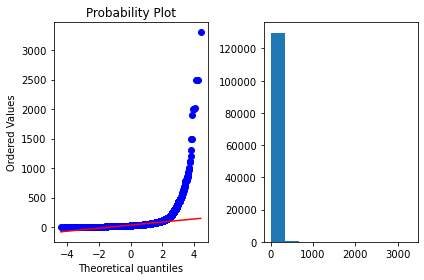

In [15]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

КОРРЕЛЯЦИЯ СПИРМЕНА

In [16]:
df.corr( method = 'spearman' )

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.009378,0.003751
points,0.009378,1.000000,0.581095
price,0.003751,0.581095,1.000000


Лучшим вариантом будет придерживаться правил корреляций каждого из методов: для непрерывных нормально распределённых используем корреляцию Пирсона, для категориальных — ранговую. Однако в спорных случаях мы рассматриваем несколько вариантов корреляций. 

КОРРЕЛЯЦИЯ КЕНДАЛЛА

In [17]:
df.corr( method = 'kendall' )

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.006536,0.002533
points,0.006536,1.000000,0.433498
price,0.002533,0.433498,1.000000


КОРРЕЛЯЦИЯ МЭТЬЮСА

In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.metrics import matthews_corrcoef

In [20]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

Визуализация корреляций

Набор данных содержит ~600 записей о девушках и семь признаков:

BMI — индекс массы тела (ИМТ)\
year — год размещения модели в журнале\
waist — обхват талии модели\
hips — обхват бёдер модели\
height — рост модели\
weight — вес модели\
waist/hip — соотношение обхвата талии и бёдер

In [21]:
data = pd.read_csv('data/model.csv')

МАТРИЦА КОРРЕЛЯЦИЙ

In [23]:
data.corr()

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ

In [24]:
import seaborn as sns

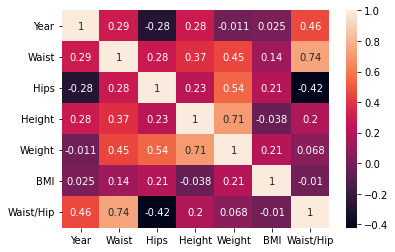

In [25]:
sns.heatmap(data.corr(), annot = True)

SCATTERPLOT

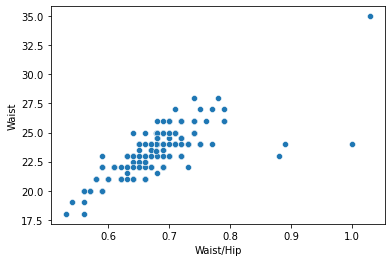

In [26]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist")

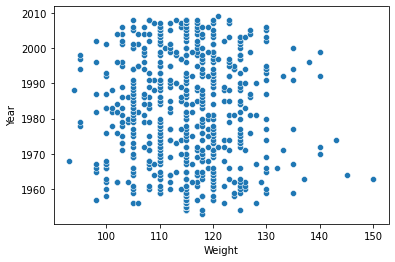

In [27]:
sns.scatterplot(data=data, x="Weight", y="Year")

Сравнив эти два графика, мы можем сказать, что в первой паре признаков связь видна более отчётливо, точки больше прижаты друг к другу и выстроены визуально в линию. Эта линия похожа на рассматриваемую нами в прошлом юните линейную связь. Во второй паре признаков они распределены по всему пространству — трудно выявить основную массу признаков, связь кажется очень слабой.

ГРАФИК ПОПАРНЫХ ОТНОШЕНИЙ PAIRPLOT

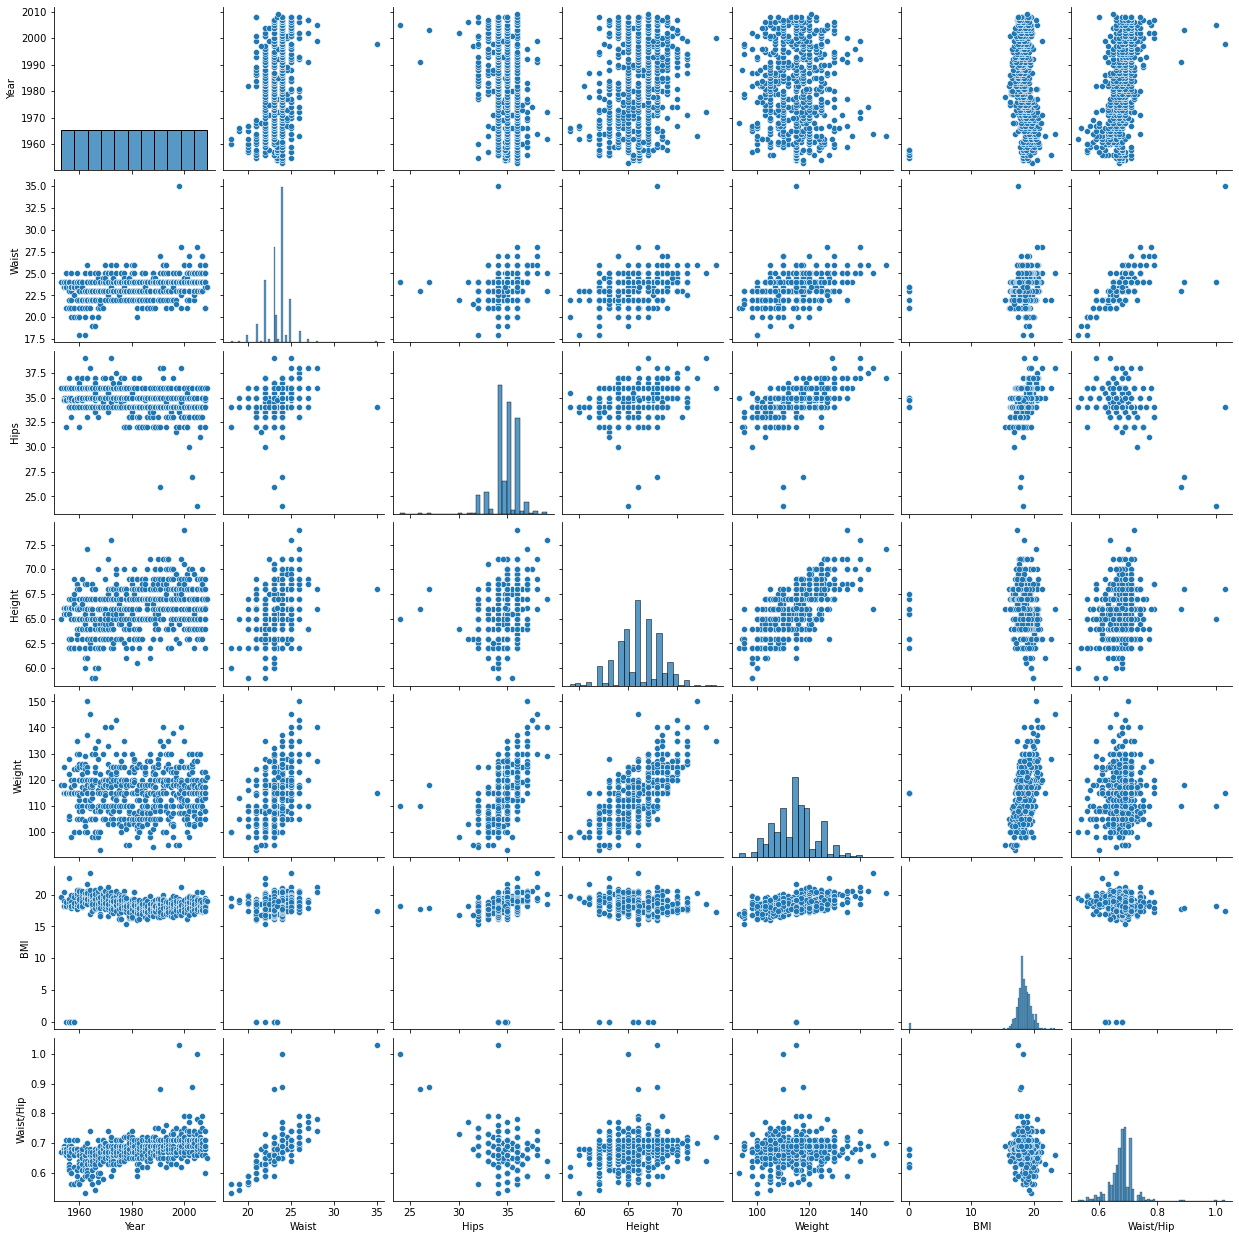

In [28]:
sns.pairplot(data)

Рассчитайте среднее значение признаков при помощи библиотеки statistics для признаков weight и height. Ответ округлите до сотых.

In [32]:
data['Weight']

0      118.000000
1      114.936066
2      114.936066
3      118.000000
4      114.936066
          ...    
657    115.000000
658    115.000000
659    108.000000
660    115.000000
661    121.000000
Name: Weight, Length: 662, dtype: float64

In [35]:
statistics.mean(data['Weight'])



114.93606557377049

In [36]:
statistics.mean(data['Height'])

66.05725806451613

Набор данных содержит ~600 записей о девушках и семь признаков:

BMI — индекс массы тела (ИМТ)\
year — год размещения модели в журнале\
waist — обхват талии модели\
hips — обхват бёдер модели\
height — рост модели\
weight — вес модели\
waist/hip — соотношение обхвата талии и бёдер

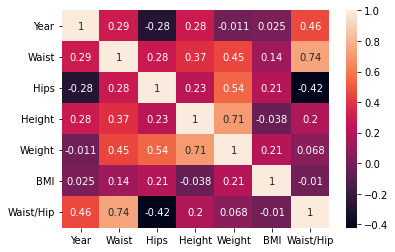

In [37]:
sns.heatmap(data.corr(), annot = True)